# PHY 210: An introduction to Solving Differential Equations

## Preliminaries

In [39]:
# import Numerical Python (NumPy)
import numpy as np

# create a low-distraction space
import warnings
warnings.filterwarnings('ignore')

In [40]:
# import Symbolic Python (SymPy)
# from sympy import Function, dsolve, Derivative, checkodesol  (use this if you don't want to import the enire SymPy package) 
from sympy import * # Use the Symbolic Python (SymPy) package
from sympy import init_printing # use LaTeX style typesetting of output
init_printing() # turn on typesetting 

In [41]:
%%html
<style>
table {float:left}
</style>

## SymPy homogeneous ODE solution

#### specify variables and function

In [42]:
# specify what we will use as symbolic variables and functions
from sympy.abc import x, y
y = Function('y') 

**Important Detail**
>You may have noticed that here we have written `y = Function ('y')` but in the Sympy Basics notebook we wrote `y = Function('y')(x)`.
When we write `y = Function('y')(x)`,  typing `y` anytime later  implicitly means y(x). That was convenient but it wasn't actually required. Your alternative is to defining `y = FUnction('y')` and then explicitly typing `y(x)` instead of just y when we need it
>
> When solving differential equations, but it turns out to be easier to keep track of what we are doing if we define `y` as a function `y = FUnction('y')` and then explicitly typing `y(x)` when we later need to indicate that y is in particular a function of x. 

#### specify the homogeneous ODE

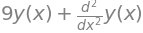

In [43]:
# here we provide an expression for the LHS. When we do this instead of proving a full equation, it is presumed that the RHS equals zero 
ODE_LHS = y(x).diff(x,2) + 9*y(x) 
ODE_LHS

#### apply the differential equation solver

In [44]:
# specify ODE and the function you want to solve for. 
# Here we want to solve for y(x) and we need to explicitly specify that y is a function of x. 
result = dsolve(ODE_LHS, y(x)) 
result

In [7]:
# what if just want the right hand side of the result? 
result.rhs

#### check that the solution works

In [8]:
checkodesol(ODE_LHS, result)  #compare the LHS of the ODE when you plug in the proposed solution to the RHS (0). 

(True, 0)

## SymPy inhomogeneous ODE solution

### first, modify command to specify an equation instead of an expression for the ODE
For an inhomogeneous equation, we need to specify both the LHS and the RHS. We therefore now specify an equation instead of an expression. To do this, we use  `Eq(LHS, RHS)` inside dsolv()

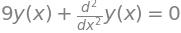

In [9]:
# define the same homogeneous ODE as before, but this time as an equation using `Eq()`
ODE_Eq = Eq(ODE_LHS, 0)
ODE_Eq

In [10]:
result = dsolve(ODE_Eq, y(x) )
result

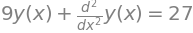

In [11]:
#now let's try an inhomogeneous ODE: 
ODE_Eq = Eq(ODE_LHS, 27)
ODE_Eq

In [12]:
result = dsolve(ODE_Eq, y(x) )
result

In [13]:
#### nice! Now  let's try progressively harder inhomogeneous ODE 

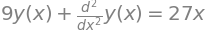

In [14]:
ODE_Eq = Eq(ODE_LHS, 27*x)
ODE_Eq

In [15]:
result = dsolve(ODE_Eq, y(x) )
result

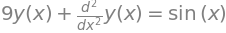

In [16]:
ODE_Eq = Eq(ODE_LHS, sin(x))
ODE_Eq

In [17]:
result = dsolve(ODE_Eq, y(x) )
result

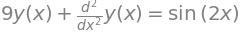

In [18]:
ODE_Eq = Eq(ODE_LHS, sin(2*x))
ODE_Eq

In [19]:
result = dsolve(ODE_Eq, y(x) )
result

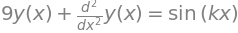

In [20]:
from sympy.abc import k
ODE_Eq = Eq(ODE_LHS, sin(k*x))
ODE_Eq

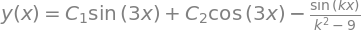

In [21]:
result = dsolve(ODE_Eq, y(x) )
result

#### “And hast thou slain the Jabberwock? Come to my arms, my beamish Smithie! O frabjous day! Callooh! Callay!” 
https://www.poetryfoundation.org/poems/42916/jabberwocky

## SymPy ODE solution with initial and/or boundary conditions

### How to set boundary conditions: some examples
- $f^{\prime}(1) = 2 \rightarrow$ `ics={f(x).diff(x).subs(x, 1): 2}`
- $f(0) =1$ and $f^\prime(2) = 3 \rightarrow$ `ics={f(0): 1, f(2): 3}`
   

In [22]:
ODE_Eq = Eq(ODE_LHS, 0)
result = dsolve(ODE_Eq, y(x) )
result

In [23]:
ODE_Eq = Eq(ODE_LHS, 0)
result = dsolve(ODE_LHS, y(x), ics={y(0): 1, y(x).diff(x).subs(x,0):1})
result

# Discovery Exercises

Exercise 1.8.1 step (2)

In [24]:
# solve dy/dx = e^x / sqrt(ky)

In [25]:
ODE_Eq = Eq(y(x).diff(x,1) , exp(x) / sqrt(k*y(x)))
result = dsolve(ODE_Eq, y(x) )
result

In [26]:
result[0]

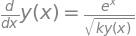

In [27]:
ODE_Eq

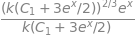

In [28]:
# let's check this result
# evaluate the LHS of this ODE
result[0].rhs.diff(x)

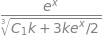

In [29]:
# let's simplify 
left = expand(result[0].rhs.diff(x))
left

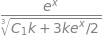

In [30]:
# let's compare with the RHS of the ODE
right = expand(exp(x)/ sqrt(k * result[0].rhs))
right

In [31]:
left.equals(right)

True

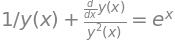

In [32]:
# Example 1.8.2


ODE_Eq = Eq((1/y(x))**2* y(x).diff(x) + (1/y(x)), exp(x))
ODE_Eq

In [33]:
problem_result = dsolve(ODE_Eq, y(x) )
problem_result


In [34]:
ODE_Eq = Eq( y(x).diff(x) + y(x), exp(x)* (y(x))**2 )
ODE_Eq

In [35]:
problem_result = dsolve(ODE_Eq, y(x) )
problem_result

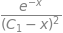

In [36]:
# verify solution
# first evaluate LHS of ODE
left = problem_result.rhs + problem_result.rhs.diff(x) 
left

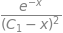

In [37]:
#now evaluate RHS of ODE

right = (problem_result.rhs)**2 * exp(x)
right

In [38]:
left.equals(right)

True

## Further investigation

start with the SymPy tutorial: [Solve an Ordinary Differential Equation (ODE) Algebraically](https://docs.sympy.org/latest/guides/solving/solve-ode.html#solving-guide-ode)


You might continue on with a [tutorial for solving one ODE or a system of ODE numerically](  https://docs.sympy.org/latest/guides/solving/solve-ode.html#numerically-solve-an-ode-in-scipy)

# Advanced Project Assignment

## Task 1
Use SymPy to find the general solution to the differential equation given in the example on page 488, Chapter 10, Section 10.2

## Task 2
Use SymPy to find the general solution to two differential equations given as examples on page 489, Chapter 10, Section 10.2 under 'Guessing Hints for Homogeneous Equations'

## Task 3
Use SymPy to find the general solutions to the differential equation examples given on page 490, Chapter 10, Section 10.2 'Guessing Hints for Inhomogeneous Equations'

## Task 4
Use SymPy to find the general solutions to the 4 differential equation examples given on page 491-492, Chapter 10, Section 10.2 'Some things that can go wrong and their solutions'